<a href="https://colab.research.google.com/github/praveenjune17/Neural-Machine-Translation-English-Tamil-model/blob/master/English2Tamil_Machine_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

## Features 

Not have experience Out off vocab issue still since it uses subword encoding tech

## Read transformer
## Read BERT
## Run the prediction task for BERT seperately
## Train with the model with the BERT model

In [99]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
from google.colab import drive


if not os.path.exists('drive'):
  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive




## Patch to add eng_tam_parallel text to tensorflow datasets


In [2]:
import os
from collections import defaultdict
if not os.path.exists('datasets'):
  !git clone https://github.com/tensorflow/datasets
if not os.path.exists('Neural-Machine-Translation-English-Tamil-model'):
  !git clone https://github.com/praveenjune17/Neural-Machine-Translation-English-Tamil-model
  !unzip Neural-Machine-Translation-English-Tamil-model/dependencies.zip

!python datasets/tensorflow_datasets/scripts/create_new_dataset.py \
  --dataset en_tam_parallel_text \
  --type translate

import shutil

path = '/usr/local/lib/python3.6/dist-packages/tensorflow_datasets'
# shutil.copy2('../content/dependencies/en_tam_parallel_corpus_validation.txt', os.path.join(path, 'testing/test_data/fake_examples/en_tam_parallel_text/en_tam_parallel_corpus_validation'))
# shutil.copy2('../content/dependencies/en_tam_parallel_corpus_train.txt', os.path.join(path, 'testing/test_data/fake_examples/en_tam_parallel_text/en_tam_parallel_corpus_train'))
# shutil.copy2('../content/dependencies/en_tam_parallel_corpus_test.txt', os.path.join(path,'testing/test_data/fake_examples/en_tam_parallel_text/en_tam_parallel_corpus_test'))
# shutil.copy('../content/dependencies/en_tam_parallel_text.py', os.path.join(path, 'translate/en_tam_parallel_text.py'))
# shutil.copy('../content/dependencies/en_tam_parallel_text_test.py', os.path.join(path, 'translate/en_tam_parallel_text_test.py'))
# shutil.copy('../content/dependencies/en_tam_parallel_text.txt', os.path.join(path, 'url_checksums/en_tam_parallel_text.txt'))

# !pip install tf-nightly-gpu
# #!pip install tensorflow-gpu
# !pip install tensorflow-gpu==2.0.0-beta1

# import tensorflow_datasets as tfds
# import tensorflow as tf

# import time
# import numpy as np
# import matplotlib.pyplot as plt

Cloning into 'datasets'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 11813 (delta 4), reused 15 (delta 1), pack-reused 11794
Receiving objects: 100% (11813/11813), 81.21 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (8376/8376), done.
Dataset generated in /usr/local/lib/python3.6/dist-packages/tensorflow_datasets
You can start with searching TODO(en_tam_parallel_text).
Please check this `https://github.com/tensorflow/datasets/blob/master/docs/add_dataset.md`for details.


In [3]:
shutil.copy2('../content/dependencies/en_tam_parallel_corpus_validation.txt', os.path.join(path, 'testing/test_data/fake_examples/en_tam_parallel_text/en_tam_parallel_corpus_validation'))
shutil.copy2('../content/dependencies/en_tam_parallel_corpus_train.txt', os.path.join(path, 'testing/test_data/fake_examples/en_tam_parallel_text/en_tam_parallel_corpus_train'))
shutil.copy2('../content/dependencies/en_tam_parallel_corpus_test.txt', os.path.join(path,'testing/test_data/fake_examples/en_tam_parallel_text/en_tam_parallel_corpus_test'))
shutil.copy('../content/dependencies/en_tam_parallel_text.py', os.path.join(path, 'translate/en_tam_parallel_text.py'))
shutil.copy('../content/dependencies/en_tam_parallel_text_test.py', os.path.join(path, 'translate/en_tam_parallel_text_test.py'))
shutil.copy('../content/dependencies/en_tam_parallel_text.txt', os.path.join(path, 'url_checksums/en_tam_parallel_text.txt'))

!pip install tf-nightly-gpu
#!pip install tensorflow-gpu
!pip install tensorflow-gpu==2.0.0-beta1

import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 406.6MB 45kB/s 
     |████████████████████████████████| 4.1MB 33.4MB/s 
     |████████████████████████████████| 61kB 21.5MB/s 
     |████████████████████████████████| 501kB 38.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built opt-einsum
     |████████████████████████████████| 348.9MB 44kB/s 
     |████████████████████████████████| 3.1MB 19.7MB/s 
     |████████████████████████████████| 501kB 10.1MB/s 
ERROR: tf-nightly-gpu 1.15.0.dev20190726 has requirement tb-nightly<1.16.0a0,>=1.15.0a0, but you'll have tb-nightly 1.14.0a20190603 which is incompatible.
  Found existing installation: tb-nightly 1.15.0a20190726
    Uninstalling tb-nightly-1.15.0a20190726:
      Successfully uninstalled tb-nightly-1.15.0a20190726
  Found existing installation: tf-estimator-nightly 1.14.0.dev2019072601
    Uninstalling tf-estimator-nightly-1.14.0.dev2019072601:
      Successfully unin

## Setup input pipeline

Create a custom subwords tokenizer from the training dataset. 

In [45]:
en_tam_ds = defaultdict(list)
#List of available datasets in the package
names = ['GNOME_v1_en_to_ta', 'GNOME_v1_en_AU_to_ta', 'GNOME_v1_en_CA_to_ta', 
         'GNOME_v1_en_GB_to_ta', 'GNOME_v1_en_US_to_ta', 'KDE4_v2_en_to_ta', 
         'KDE4_v2_en_GB_to_ta', 'Tatoeba_v20190709_en_to_ta', 'Ubuntu_v14.10_en_to_ta_LK', 
         'Ubuntu_v14.10_en_GB_to_ta_LK', 'Ubuntu_v14.10_en_AU_to_ta_LK', 'Ubuntu_v14.10_en_CA_to_ta_LK', 
         'Ubuntu_v14.10_en_US_to_ta_LK', 'Ubuntu_v14.10_en_to_ta', 'Ubuntu_v14.10_en_GB_to_ta', 
         'Ubuntu_v14.10_en_AU_to_ta', 'Ubuntu_v14.10_en_CA_to_ta', 'Ubuntu_v14.10_en_NZ_to_ta', 
         'Ubuntu_v14.10_en_US_to_ta', 'OpenSubtitles_v2018_en_to_ta', 'OpenSubtitles_v2016_en_to_ta',
         'en_ta']

for name in names:
  en_tam_ds[(name,'metadata_'+name)] = tfds.load('en_tam_parallel_text/'+name, 
                                           with_info=True, as_supervised=True)

W0727 04:32:40.365333 140102580955008 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0727 04:32:40.419411 140102580955008 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0727 04:32:40.468669 140102580955008 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
W0727 04:32:40.517143 140102580955008 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_file

In [0]:
#initialize the first dataset to the train_examples variable
#Concatenate all the train datasets
train_examples = en_tam_ds[('GNOME_v1_en_to_ta', 'metadata_GNOME_v1_en_to_ta')][0]['train']
for typ in list(en_tam_ds.keys())[1:]:
  train_examples = train_examples.concatenate(en_tam_ds[typ][0]['train'])
  #validation and test sets are only available for a single typ
  if typ[0] == 'en_ta':
    test_examples = en_tam_ds[typ][0]['test']
    validation_examples = en_tam_ds[typ][0]['validation']

In [94]:
#calculate record count
start = time.time()
count=0
for e,t in train_examples:
  count+=1
print('time to count is {}'.format(time.time()-start)) #Took 194 seconds in the last run
print('Total record count is {}'.format(count)) #should be 548285

time to count is 194.81414222717285
Total record count is 548285


In [0]:
train_examples = en_tam_data['train']
validation_examples = en_tam_data['validation']
test_examples = en_tam_data['test']

## Hyper parameters tagged as \#Hyp


### Load the old vocab file from G-drive if available else create.

Note :- default vocab size is assumed to be 2^13, so if want to change it then don't load the file from G-drive

In [0]:
#one pair of vocab also available
# ../content/drive/My Drive/Neural_machine_translation/Transformer_model/vocab_en_548285
# ../content/drive/My Drive/Neural_machine_translation/Transformer_model/vocab_ta_548285
#Zip it and save to reduce space in G-drive
en_vocab_path = '../content/drive/My Drive/Neural_machine_translation/Transformer_model/vocab_en' #_'+str(count)
ta_vocab_path = '../content/drive/My Drive/Neural_machine_translation/Transformer_model/vocab_ta' #_'+str(count)

if os.path.exists(en_vocab_path+'.subwords') and os.path.exists(ta_vocab_path+'.subwords'):
  tokenizer_en = tfds.features.text.SubwordTextEncoder.load_from_file(en_vocab_path)
  tokenizer_ta = tfds.features.text.SubwordTextEncoder.load_from_file(ta_vocab_path)
else:
  #Took  900 seconds to create in the last run
  tokenizer_en = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    (en.numpy() for  en, _ in train_examples), target_vocab_size=2**13)
  tokenizer_ta = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    (ta.numpy() for _, ta in train_examples), target_vocab_size=2**13)
  tokenizer_en.save_to_file(en_vocab_path)
  tokenizer_ta.save_to_file(ta_vocab_path)

In [174]:
sample_string = 'Transformer is awesome.'

tokenized_string_eng = tokenizer_en.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string_eng))

original_string = tokenizer_en.decode(tokenized_string_eng)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [4053, 812, 9, 2362, 164, 2209, 7967]
The original string: Transformer is awesome.


The tokenizer encodes the string by breaking it into subwords if the word is not in its dictionary.

In [175]:
sample_string = 'நீங்கள் இங்கு அரட்டை அடிக்க அனுமதி இல்லை'
tokenized_string_ta = tokenizer_ta.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string_ta))

original_string = tokenizer_ta.decode(tokenized_string_ta)
print ('The original string: {}'.format(original_string))
assert original_string == sample_string

Tokenized string is [20, 26, 41, 1, 14, 5, 376, 1, 4, 17, 1605, 1, 10, 23, 99, 2, 4, 1, 29, 89, 3, 132, 34, 129, 1, 13, 12]
The original string: நீங்கள் இங்கு அரட்டை அடிக்க அனுமதி இல்லை


In [176]:
for ts in tokenized_string_eng:
  print ('{} ----> {}'.format(ts, tokenizer_en.decode([ts])))

4053 ----> Trans
812 ----> former 
9 ----> is 
2362 ----> aw
164 ----> es
2209 ----> ome
7967 ----> .


In [177]:
for ts in tokenized_string_ta:
  print ('{} ----> {}'.format(ts, tokenizer_ta.decode([ts])))

20 ----> ந
26 ----> ீ
41 ----> ங
1 ----> ்
14 ----> கள
5 ----> ் 
376 ----> இங
1 ----> ்
4 ----> க
17 ----> ு 
1605 ----> அரட
1 ----> ்
10 ----> ட
23 ----> ை 
99 ----> அட
2 ----> ி
4 ----> க
1 ----> ்
29 ----> க 
89 ----> அன
3 ----> ு
132 ----> மத
34 ----> ி 
129 ----> இல
1 ----> ்
13 ----> ல
12 ----> ை


## Goal


a) Try to get a subset of the datset for checking the training process

In [0]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64                                                             #Hyp2
MAX_LENGTH = 40                 #drop examples of len 40 tokens
train_from_scratch = False

Add a start and end token to the input and target. 

In [0]:
def encode(lang1, lang2):
  lang1 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
      lang1.numpy()) + [tokenizer_en.vocab_size+1]

  lang2 = [tokenizer_ta.vocab_size] + tokenizer_ta.encode(
      lang2.numpy()) + [tokenizer_ta.vocab_size+1]
  #print(len(lang1),len(lang2))
  
  return lang1, lang2

In [0]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
  
  return tf.logical_and(tf.size(x) <= max_length,
                        tf.size(y) <= max_length)

Operations inside `.map()` run in graph mode and receive a graph tensor that do not have a numpy attribute. The `tokenizer` expects a string or Unicode symbol to encode it into integers. Hence, you need to run the encoding inside a `tf.py_function`, which receives an eager tensor having a numpy attribute that contains the string value.

In [0]:
def tf_encode(en, ta):
  return tf.py_function(encode, [en, ta], [tf.int64, tf.int64])

In [0]:
# train_dataset = train_examples.map(tf_encode)
# train_dataset = train_dataset.cache()
# train_dataset = train_dataset.shuffle(1).padded_batch(
#     1, padded_shapes=([-1], [-1]))
# train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# train_dataset_with_filt = train_examples.map(tf_encode)
# train_dataset_with_filt = train_dataset_with_filt.cache()
# train_dataset_with_filt = train_dataset_with_filt.filter(filter_max_length)
# train_dataset_with_filt = train_dataset_with_filt.shuffle(1).padded_batch(
#     1, padded_shapes=([-1], [-1]))
# train_dataset_with_filt = train_dataset_with_filt.prefetch(tf.data.experimental.AUTOTUNE)

In [0]:
train_dataset = train_examples.map(tf_encode)
train_dataset = train_dataset.filter(filter_max_length)

# cache the dataset to memory to get a speedup while reading from it.
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(
    BATCH_SIZE, padded_shapes=([-1], [-1]))
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.take(1)

validation_dataset = validation_examples.map(tf_encode)
val_dataset = validation_dataset.filter(filter_max_length).padded_batch(
    BATCH_SIZE, padded_shapes=([-1], [-1]))

In [0]:
#printout the number of filtered observations
#create a small subset of the train_dataset

In [239]:
pt_batch, en_batch = next(iter(validation_dataset))
pt_batch, en_batch

(<tf.Tensor: id=12822723, shape=(339,), dtype=int64, numpy=
 array([8177, 8145, 8095, 8070, 8145, 8095, 8085, 8145, 8095, 8111, 8145,
        8095, 8089, 8145, 8095, 8111, 8145, 8095, 8096, 8145, 8095, 8070,
        8145, 8095, 8112, 8145, 8095, 8096, 8145, 8095, 8111, 8145, 8095,
        8070, 7953, 8145, 8095, 8085, 8145, 8095, 8112, 8145, 8095, 8102,
        8145, 8096, 8062, 8145, 8095, 8096, 8145, 8095, 8111, 7953, 8145,
        8095, 8054, 8145, 8095, 8098, 8145, 8095, 8112, 8145, 8095, 8095,
        8145, 8096, 8050, 8145, 8095, 8070, 8145, 8095, 8095, 8145, 8095,
        8111, 8145, 8095, 8070, 8145, 8095, 8112, 8145, 8095, 8098, 8145,
        8095, 8111, 8145, 8095, 8097, 8145, 8096, 8062, 7953, 8145, 8095,
        8095, 8145, 8095, 8098, 8145, 8096, 8062, 8145, 8095, 8098, 8145,
        8096, 8050, 8145, 8095, 8095, 8145, 8096, 8062, 7953, 8145, 8095,
        8102, 8145, 8095, 8080, 8145, 8095, 8112, 8145, 8095, 8102, 8145,
        8096, 8050, 8145, 8095, 8070, 8145, 8096, 80

## Positional encoding

Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence. 

The positional encoding vector is added to the embedding vector. Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position of words in a sentence. So after adding the positional encoding, words will be closer to each other based on the *similarity of their meaning and their position in the sentence*, in the d-dimensional space.

See the notebook on [positional encoding](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb) to learn more about it. The formula for calculating the positional encoding is as follows:

$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

In [0]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [0]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  sines = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  cosines = np.cos(angle_rads[:, 1::2])
  
  pos_encoding = np.concatenate([sines, cosines], axis=-1)
  
  pos_encoding = pos_encoding[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


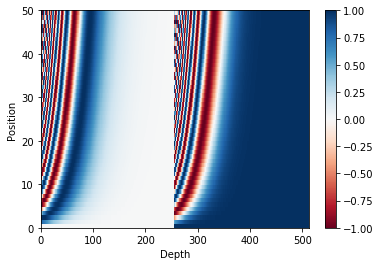

In [242]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## Masking

Mask all the pad tokens in the batch of sequence. It ensures that the model does not treat padding as the input. The mask indicates where pad value `0` is present: it outputs a `1` at those locations, and a `0` otherwise.

In [0]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions so that we can add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [244]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: id=12822740, shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

The look-ahead mask is used to mask the future tokens in a sequence. In other words, the mask indicates which entries should not be used.

This means that to predict the third word, only the first and second word will be used. Similarly to predict the fourth word, only the first, second and the third word will be used and so on.

In [0]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [246]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: id=12822756, shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

## Scaled dot product attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/scaled_attention.png" width="500" alt="scaled_dot_product_attention">

The attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:

$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$

The dot-product attention is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax. 

For example, consider that `Q` and `K` have a mean of 0 and variance of 1. Their matrix multiplication will have a mean of 0 and variance of `dk`. Hence, *square root of `dk`* is used for scaling (and not any other number) because the matmul of `Q` and `K` should have a mean of 0 and variance of 1, so that we get a gentler softmax.

The mask is multiplied with -1e9 (close to negative infinity). This is done because the mask is summed with the scaled matrix multiplication of Q and K and is applied immediately before a softmax. The goal is to zero out these cells, and large negative inputs to softmax are near zero in the output.

In [0]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

As the softmax normalization is done on K, its values decide the amount of importance given to Q.

The output represents the multiplication of the attention weights and the V (value) vector. This ensures that the words we want to focus on are kept as is and the irrelevant words are flushed out.

In [0]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

In [249]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [250]:
# This query aligns with a repeated key (third and fourth), 
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [251]:
# This query aligns equally with the first and second key, 
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


Pass all the queries together.

In [252]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


## Multi-head attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" alt="multi-head attention">


Multi-head attention consists of four parts:
*    Linear layers and split into heads.
*    Scaled dot-product attention.
*    Concatenation of heads.
*    Final linear layer.

Each multi-head attention block gets three inputs; Q (query), K (key), V (value). These are put through linear (Dense) layers and split up into multiple heads. 

The `scaled_dot_product_attention` defined above is applied to each head (broadcasted for efficiency). An appropriate mask must be used in the attention step.  The attention output for each head is then concatenated (using `tf.transpose`, and `tf.reshape`) and put through a final `Dense` layer.

Instead of one single attention head, Q, K, and V are split into multiple heads because it allows the model to jointly attend to information at different positions from different representational spaces. After the split each head has a reduced dimensionality, so the total computation cost is the same as a single head attention with full dimensionality.

In [0]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

Create a `MultiHeadAttention` layer to try out. At each location in the sequence, `y`, the `MultiHeadAttention` runs all 8 attention heads across all other locations in the sequence, returning a new vector of the same length at each location.

In [254]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

## Point wise feed forward network

Point wise feed forward network consists of two fully-connected layers with a ReLU activation in between.

In [0]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [256]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

## Encoder and decoder

<img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png" width="600" alt="transformer">

The transformer model follows the same general pattern as a standard [sequence to sequence with attention model](nmt_with_attention.ipynb). 

* The input sentence is passed through `N` encoder layers that generates an output for each word/token in the sequence.
* The decoder attends on the encoder's output and its own input (self-attention) to predict the next word. 

### Encoder layer

Each encoder layer consists of sublayers:

1.   Multi-head attention (with padding mask) 
2.    Point wise feed forward networks. 

Each of these sublayers has a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis. There are N encoder layers in the transformer.

In [0]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

In [258]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

### Decoder layer

Each decoder layer consists of sublayers:

1.   Masked multi-head attention (with look ahead mask and padding mask)
2.   Multi-head attention (with padding mask). V (value) and K (key) receive the *encoder output* as inputs. Q (query) receives the *output from the masked multi-head attention sublayer.*
3.   Point wise feed forward networks

Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis.

There are N decoder layers in the transformer.

As Q receives the output from decoder's first attention block, and K receives the encoder output, the attention weights represent the importance given to the decoder's input based on the encoder's output. In other words, the decoder predicts the next word by looking at the encoder output and self-attending to its own output. See the demonstration above in the scaled dot product attention section.

In [0]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

In [260]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output, 
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

### Encoder

The `Encoder` consists of:
1.   Input Embedding
2.   Positional Encoding
3.   N encoder layers

The input is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the encoder layers. The output of the encoder is the input to the decoder.

In [0]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(input_vocab_size, self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    
    return x  # (batch_size, input_seq_len, d_model)

In [262]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500)

sample_encoder_output = sample_encoder(tf.random.uniform((64, 62)), 
                                       training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


### Decoder

 The `Decoder` consists of:
1.   Output Embedding
2.   Positional Encoding
3.   N decoder layers

The target is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the decoder layers. The output of the decoder is the input to the final linear layer.

In [0]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, 
               rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(target_vocab_size, self.d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [264]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, target_vocab_size=8000)

output, attn = sample_decoder(tf.random.uniform((64, 26)), 
                              enc_output=sample_encoder_output, 
                              training=False, look_ahead_mask=None, 
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

## Create the Transformer

Transformer consists of the encoder, decoder and a final linear layer. The output of the decoder is the input to the linear layer and its output is returned.

In [0]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [266]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048, 
    input_vocab_size=8500, target_vocab_size=8000)

temp_input = tf.random.uniform((64, 62))
temp_target = tf.random.uniform((64, 26))

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 26, 8000])

## Set hyperparameters

To keep this example small and relatively fast, the values for *num_layers, d_model, and dff* have been reduced. 

The values used in the base model of transformer were; *num_layers=6*, *d_model = 512*, *dff = 2048*. See the [paper](https://arxiv.org/abs/1706.03762) for all the other versions of the transformer.

Note: By changing the values below, you can get the model that achieved state of the art on many tasks.

In [286]:
num_layers = 4
d_model = 256
dff = 1024
num_heads = 4

input_vocab_size = tokenizer_en.vocab_size + 2
target_vocab_size = tokenizer_ta.vocab_size + 2
dropout_rate = 0.3

print('english vocab size is {} '.format(input_vocab_size))
print('tamil vocab size is {}'.format(target_vocab_size))


##Hyper parameter used in the First run 
# num_layers = 4
# d_model = 256
# dff = 1024  
# num_heads = 4

# input_vocab_size = tokenizer_ta.vocab_size + 2
# target_vocab_size = tokenizer_en.vocab_size + 2
# dropout_rate = 0.3
#'''

english vocab size is 8179 
tamil vocab size is 7982


## Optimizer

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the [paper](https://arxiv.org/abs/1706.03762).

$$\Large{lrate = d_{model}^{-0.5} * min(step{\_}num^{-0.5}, step{\_}num * warmup{\_}steps^{-1.5})}$$


In [0]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [0]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

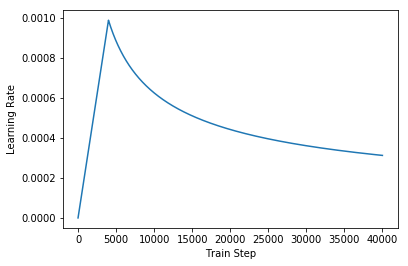

In [289]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## Loss and metrics

Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [0]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_mean(loss_)

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

## Training and checkpointing

In [0]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, dropout_rate)

In [0]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

Create the checkpoint path and the checkpoint manager. This will be used to save checkpoints every `n` epochs.

In [0]:
if train_from_scratch == True:
  checkpoint_path = './checkpoints/train'
else:
  checkpoint_path = '../content/drive/My Drive/Neural_machine_translation/Transformer_model/checkpoints'

In [303]:
ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint).assert_consumed()#.expect_partial()
  print ('Latest checkpoint restored is {} !!'.format(ckpt_manager.latest_checkpoint.split('/')[-1]))
  print ('size of the checkpoint directory is {}MB '.format(sum(os.path.getsize(os.path.join(checkpoint_path,f)) for f in os.listdir(checkpoint_path))/(1024*1024)))

Latest checkpoint restored is ckpt-52 !!
size of the checkpoint directory is 776.7983846664429MB 


The target is divided into tar_inp and tar_real. tar_inp is passed as an input to the decoder. `tar_real` is that same input shifted by 1: At each location in `tar_input`, `tar_real` contains the  next token that should be predicted.

For example, `sentence` = "SOS A lion in the jungle is sleeping EOS"

`tar_inp` =  "SOS A lion in the jungle is sleeping"

`tar_real` = "A lion in the jungle is sleeping EOS"

The transformer is an auto-regressive model: it makes predictions one part at a time, and uses its output so far to decide what to do next. 

During training this example uses teacher-forcing (like in the [text generation tutorial](./text_generation.ipynb)). Teacher forcing is passing the true output to the next time step regardless of what the model predicts at the current time step.

As the transformer predicts each word, *self-attention* allows it to look at the previous words in the input sequence to better predict the next word.

To prevent the model from peaking at the expected output the model uses a look-ahead mask.

In [0]:
EPOCHS = 122

In [0]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

tamil is used as the input language and English is the target language.

In [343]:
for epoch in range(EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # inp -> english, tar -> tamil
  for (batch, (inp, tar)) in enumerate(train_dataset):
    train_step(inp, tar)
    
    if batch % 50 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

  print ('Time taken for {0} epoch: {1} secs\n'.format(epoch + 1, time.time() - start))

Epoch 1 Batch 0 Loss 0.0463 Accuracy 0.4748
Epoch 1 Loss 0.0463 Accuracy 0.4748
Time taken for 1 epoch: 42.782777309417725 secs

Epoch 2 Batch 0 Loss 0.0427 Accuracy 0.4744
Epoch 2 Loss 0.0427 Accuracy 0.4744
Time taken for 2 epoch: 19.73622155189514 secs

Epoch 3 Batch 0 Loss 0.0550 Accuracy 0.4722
Epoch 3 Loss 0.0550 Accuracy 0.4722
Time taken for 3 epoch: 19.646422386169434 secs

Epoch 4 Batch 0 Loss 0.0646 Accuracy 0.4666
Epoch 4 Loss 0.0646 Accuracy 0.4666
Time taken for 4 epoch: 19.836801052093506 secs

Epoch 5 Batch 0 Loss 0.0401 Accuracy 0.4740
Saving checkpoint for epoch 5 at ../content/drive/My Drive/Neural_machine_translation/Transformer_model/checkpoints/ckpt-75
Epoch 5 Loss 0.0401 Accuracy 0.4740
Time taken for 5 epoch: 20.528640270233154 secs

Epoch 6 Batch 0 Loss 0.0575 Accuracy 0.4635
Epoch 6 Loss 0.0575 Accuracy 0.4635
Time taken for 6 epoch: 20.479491472244263 secs

Epoch 7 Batch 0 Loss 0.0536 Accuracy 0.4705
Epoch 7 Loss 0.0536 Accuracy 0.4705
Time taken for 7 epoch:

## Evaluate

The following steps are used for evaluation:

* Encode the input sentence using the tamil3 tokenizer (`tokenizer_ta`). Moreover, add the start and end token so the input is equivalent to what the model is trained with. This is the encoder input.
* The decoder input is the `start token == tokenizer_en.vocab_size`.
* Calculate the padding masks and the look ahead masks.
* The `decoder` then outputs the predictions by looking at the `encoder output` and its own output (self-attention).
* Select the last word and calculate the argmax of that.
* Concatentate the predicted word to the decoder input as pass it to the decoder.
* In this approach, the decoder predicts the next word based on the previous words it predicted.

Note: The model used here has less capacity to keep the example relatively faster so the predictions maybe less right. To reproduce the results in the paper, use the entire dataset and base transformer model or transformer XL, by changing the hyperparameters above.

In [0]:
#test case for opus
#beam_search decoder (paper highlights)
##use BERT to intialize weights
#train and Validation plot and visualize in tensorboard try with checkpoint 52 as start
#Follow karpthy's suggestion and then 
#Publish paper , go through the IIT paper and get the results of validation and test
#Add the preprocess code (if the pair contains same language then filter them) and then Publish the new dataset to tfds




#preprocessing to remove english in tamil and tamil in english

#a)
#TA_BLACKLIST = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz-(\')''/[]♪/%#$&\/_"{.}|=<>@~`'
#EN_BLACKLIST = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ"#$%&\()*+-./:;<=>@[\\]^_`♪{|}~='
#credits https://github.com/himanshudce/MIDAS-NMT-English-Tamil/blob/master/Data%20perprocessing/data.py

#b)
#change to lower case (just for en)

#c) remove minimum and max len can be done in TF.data too

# limit = {
#         'maxta' : 50,
#         'minta' : 3,
#         'maxen' : 50,
#         'minen' : 3
#         }


def filter_line(line, blacklist):
    return ''.join([ ch for ch in line if ch not in blacklist ])

In [0]:
def evaluate(inp_sentence):
  start_token = [tokenizer_en.vocab_size]
  end_token = [tokenizer_en.vocab_size + 1]
  
  # inp sentence is tamil, hence adding the start and end token
  inp_sentence = start_token + tokenizer_en.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is english, the first word to the transformer should be the
  # english start token.
  decoder_input = [tokenizer_ta.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if tf.equal(predicted_id, tokenizer_ta.vocab_size+1):
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [0]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = tokenizer_ta.encode(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')

    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence)+2))
    ax.set_yticks(range(len(result)))
    
    ax.set_ylim(len(result)-1.5, -0.5)
        
    ax.set_xticklabels(
        ['<start>']+[tokenizer_en.decode([i]) for i in sentence]+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([tokenizer_ta.decode([i]) for i in result 
                        if i < tokenizer_ta.vocab_size], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [0]:
def translate(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  
  predicted_sentence = tokenizer_ta.decode([i for i in result 
                                            if i < tokenizer_ta.vocab_size])  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)

In [346]:
translate("I don't have an opinion.")
print ("Google's translation: எனக்கு ஒரு கருத்து இல்லை .")
translate("replace it")
print ("Google's translation: அதை மாற்றவும்")
translate("You should capture some context")
print ("Google's translation: நீங்கள் சில சூழலைப் பிடிக்க வேண்டும்")
translate('Will he plead against me with his great power')
print ("Google's translation: அவர் தனது பெரும் சக்தியால் எனக்கு எதிராக மன்றாடுவாரா?")
translate("are you a fool?")
translate("follower")
translate("constituency change")
translate("Just Keep improving")

Input: I don't have an opinion.
Predicted translation: நான் சிதைந்த நியாயப்படுத்தப்பட்டால்
Google's translation: எனக்கு ஒரு கருத்து இல்லை .
Input: replace it
Predicted translation: மாற்றுக
Google's translation: அதை மாற்றவும்
Input: You should capture some context
Predicted translation: இருப்பில் உள்ள வட்டுகளுக்கு தேடுகிறது
Google's translation: நீங்கள் சில சூழலைப் பிடிக்க வேண்டும்
Input: Will he plead against me with his great power
Predicted translation: ஆகவே, அவன் தன் சபையோரை அழைக்கட்டும்.
Google's translation: அவர் தனது பெரும் சக்தியால் எனக்கு எதிராக மன்றாடுவாரா?
Input: are you a fool?
Predicted translation: நீங்கள் என்ன செய்கிறது?
Input: follower
Predicted translation: பிடிப்பு
Input: constituency change
Predicted translation: பிரிவு
Input: Just Keep improving
Predicted translation: வெற்று %s %s இல்


You can pass different layers and attention blocks of the decoder to the `plot` parameter.

### Craft MT pipeline every morning

a) Analyse the complete code
b) Check the input to the model
c) Check max length of the input that goes to the model

In [0]:
# Length of the tensor in terms of the the maximum length

## Contribution work

a) check warning during dataset download
b) enable tf.eager in the test case

## Model enhancement


b) add beam search decoder, sampling decoder

c) Visualize the vocab tensorboard

d) Try character embeddings (http://colinmorris.github.io/blog/1b-words-char-embeddings)

e) Implement the code in TPU (one line code, refer dev summit)
f) Add validation accuracy to the code and save the model based on validation accuracy





## Dataset work

*) Work out a best way to explain it to the people. Importance of NLPs

a) Clean impure data (error.txt and impure )

b) Create transformation pipelines in the tfds

c) Heuristics or automated ways to clean the data further

d) clean 10 data a day

e) evaluate how good the translation is

f) Ways to collect more data

### Training observations

a) System crash during training 
suspected reason :- big sentence pairs

b) Low signal to noise ratio in the dataset

c) loss is not converging to zero (reduce dataset size and try from scratch to make loss zero)

### Things to try

a) Small transformer model and feed it with a small data and increase the complexity untill the loss reaches zero

## First run hyper parameters
num_layers = 4
d_model = 256
dff = 1024  
num_heads = 4

input_vocab_size = tokenizer_ta.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2
dropout_rate = 0.3

In [0]:



#Save checkpoints
#More epoch required to converge
#beam search decoder
#Increase layers
#Read BERT
#Visualize


## Summary

In this tutorial, you learned about positional encoding, multi-head attention, the importance of masking and how to create a transformer.

Try using a different dataset to train the transformer. You can also create the base transformer or transformer XL by changing the hyperparameters above. You can also use the layers defined here to create [BERT](https://arxiv.org/abs/1810.04805) and train state of the art models. Futhermore, you can implement beam search to get better predictions.